<a href="https://colab.research.google.com/github/badhanamitroy/AI_lab_Classes/blob/main/DIP_Lab_Mid_Works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Lab no: 01
# Task:Load and Display a single image and Sample dataset in colab. Find Details of image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

Total images: 200


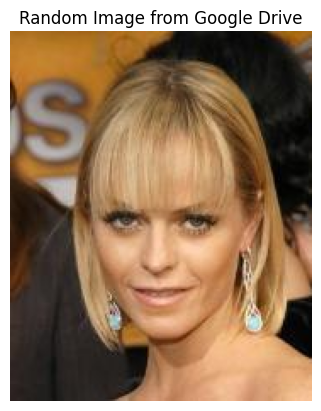

----- Image Details -----
Format: .jpg
Dimensions: 178 x 218 pixels
Channels: 3
Resolution (Total Pixels): 116412
Data Type: uint8
File Size: 7.40 KB
Aspect Ratio: 0.82


In [5]:
# Loading Images from drive
Realface_image_folder_path = '/content/drive/MyDrive/Colab Notebooks/DIP-lab-works/100Real-Human-Face'
AIface_image_folder_path = '/content/drive/MyDrive/Colab Notebooks/DIP-lab-works/100AI-Generated-Human-Face'

# List all image files in each folder
real_images = [os.path.join(Realface_image_folder_path, img) for img in os.listdir(Realface_image_folder_path) if img.endswith(('.jpg', '.png', '.jpeg'))]
ai_images = [os.path.join(AIface_image_folder_path, img) for img in os.listdir(AIface_image_folder_path) if img.endswith(('.jpg', '.png', '.jpeg'))]

# Combine both lists
all_images = real_images + ai_images

print(f"Total images: {len(all_images)}")

# Display a random image
random_Image = random.choice(all_images)

img_path = random_Image
img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis('off')
plt.title('Random Image from Google Drive')
plt.show()

# Get dimensions safely
height, width = img.shape[:2]
channels = img.shape[2] if len(img.shape) == 3 else 1

# Get image properties
image_size = img.size
image_dtype = img.dtype
image_format = os.path.splitext(img_path)[1]
image_bytes = os.path.getsize(img_path) / 1024
aspect_ratio = round(width / height, 2)

# Display details
print("----- Image Details -----")
print(f"Format: {image_format}")
print(f"Dimensions: {width} x {height} pixels")
print(f"Channels: {channels}")
print(f"Resolution (Total Pixels): {image_size}")
print(f"Data Type: {image_dtype}")
print(f"File Size: {image_bytes:.2f} KB")
print(f"Aspect Ratio: {aspect_ratio}")

# Lab no: 02
Task: Perform the following operations on all images and store the processed results in separate folders:
1. Convert RGB to Binary Image
2. Convert RGB to Grayscale Image
3. Generate histogram

In [14]:
# Import Libraries
import cv2
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
# Input and output directories
input_folder = '/content/drive/MyDrive/Colab Notebooks/DIP-lab-works/100Real-Human-Face'
grayscale_folder = '/content/drive/MyDrive/Colab Notebooks/DIP-lab-works/Output_Grayscale'
binary_folder = '/content/drive/MyDrive/Colab Notebooks/DIP-lab-works/Output_Binary'
histogram_folder = '/content/drive/MyDrive/Colab Notebooks/DIP-lab-works/Output_Histogram'

# Create output folders if they don’t exist
os.makedirs(grayscale_folder, exist_ok=True)
os.makedirs(binary_folder, exist_ok=True)
os.makedirs(histogram_folder, exist_ok=True)

# Process each image
for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        # Convert to Grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(grayscale_folder, filename), gray)

        # Convert to Binary using thresholding
        _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        cv2.imwrite(os.path.join(binary_folder, filename), binary)

        # Generate and save Histogram
        plt.figure()
        plt.title(f"Histogram of {filename}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.hist(gray.ravel(), bins=256, range=[0,256], color='black')
        plt.savefig(os.path.join(histogram_folder, filename.split('.')[0] + '_histogram.png'))
        plt.close()

print("All images processed successfully and saved in respective folders.")

All images processed successfully and saved in respective folders.


Selected Image: 000002.jpg


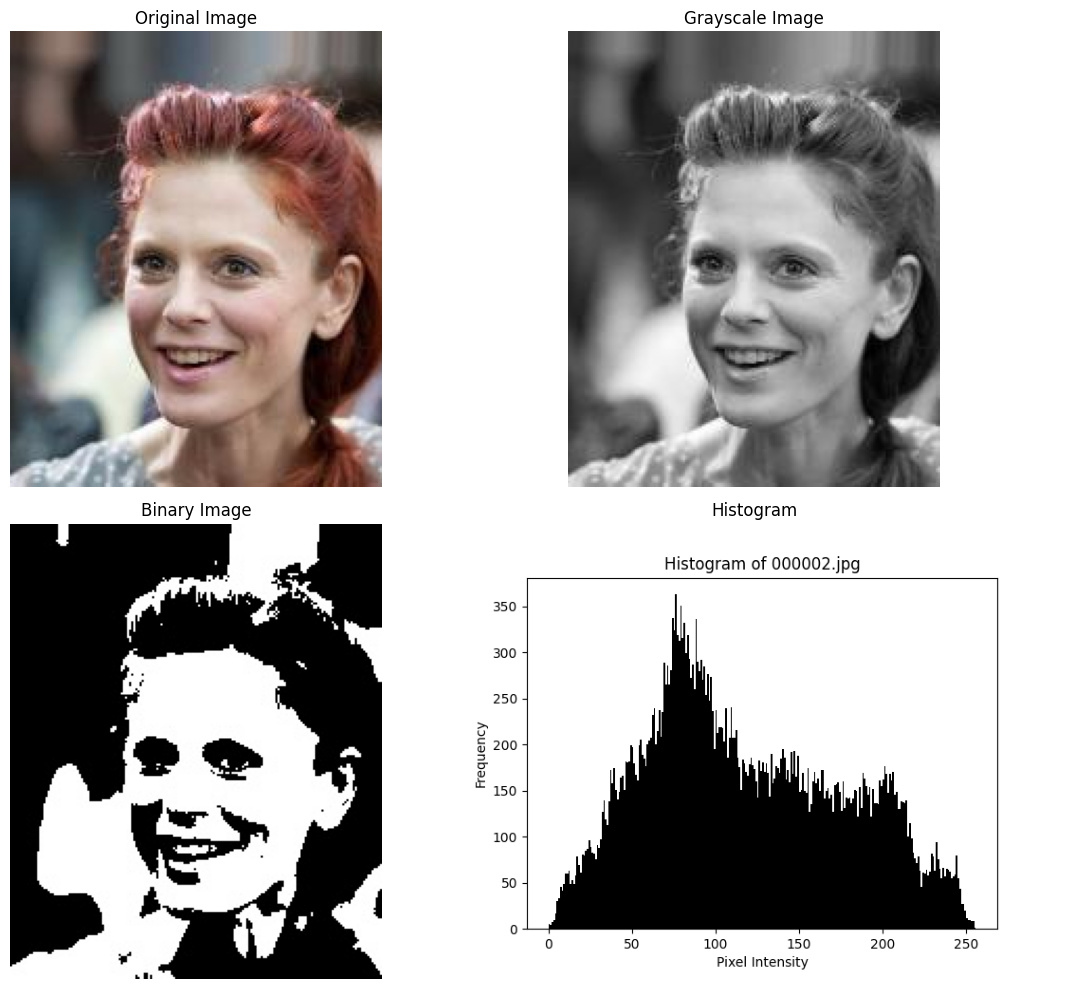

In [24]:
# Choose one random image name (same for all types)
random_filename = random.choice([f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png', '.jpeg'))])
print("Selected Image:", random_filename)

# Construct paths
original_path = os.path.join(input_folder, random_filename)
gray_path = os.path.join(grayscale_folder, random_filename)
binary_path = os.path.join(binary_folder, random_filename)
hist_path = os.path.join(histogram_folder, random_filename.split('.')[0] + '_histogram.png')

# Read images
original = mpimg.imread(original_path)
gray = mpimg.imread(gray_path)
binary = mpimg.imread(binary_path)
histogram = mpimg.imread(hist_path)

# Display all 4 images in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(original)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title("Grayscale Image")
axes[0, 1].axis('off')

axes[1, 0].imshow(binary, cmap='gray')
axes[1, 0].set_title("Binary Image")
axes[1, 0].axis('off')

axes[1, 1].imshow(histogram)
axes[1, 1].set_title("Histogram")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()